In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats.power import TTestIndPower, zt_ind_solve_power
from statsmodels.stats.weightstats import ztest, zconfint
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns

/var/folders/hp/z71npf9j1011vv7k7dvvd6mr0000gn/T/ipykernel_27688/4288628638.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
np.__version__

'1.23.5'

In [ ]:
import matplotlib
matplotlib.__version__

'3.8.2'

In [ ]:
scipy.__version__

'1.10.0'

In [ ]:
import statsmodels
statsmodels.__version__

'0.13.5'

In [ ]:
sns.__version__

'0.12.2'

In [ ]:
days = 100

In [ ]:
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [ ]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [ ]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1


/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_data = user_data.append(day_data_experiment).append(day_data_control)
/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(current_data_stat)
/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:15: FutureWarning: The frame.append method is

/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_data = user_data.append(day_data_experiment).append(day_data_control)
/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(current_data_stat)
/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_90502/228655152.py:15: FutureWarning: The frame.append method is

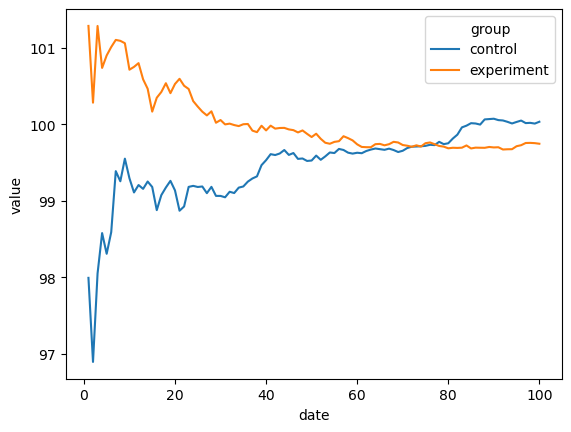

In [ ]:
ax = sns.lineplot(data=daily_data, x="date", y="value", hue='group')

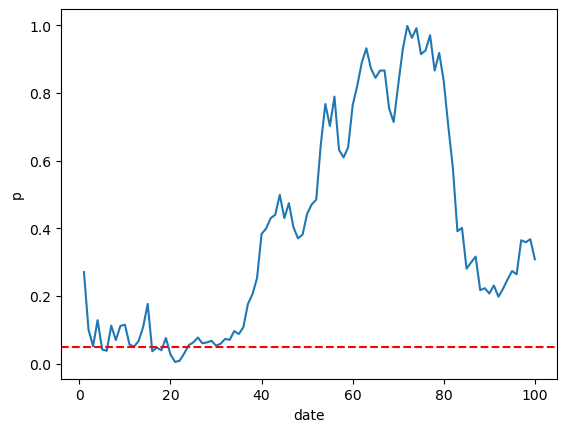

In [ ]:
ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axhline(0.05, ls='--', color='red')

# Среднее

## 1. Необходимый объем выборки

In [ ]:
ttest_ind_power = TTestIndPower()

In [ ]:
n1, n2 = 4, 4
  
# variance of samples in pilot study 
s1, s2 = 5**2, 5**2
  
# calculate the pooled standard deviation  
# (Cohen's d) 
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
  
# means of the samples 
u1, u2 = 90, 85
  
# calculate the effect size 
d = (u1 - u2) / s 
print(f'Effect size: {d}') 

Effect size: 1.0


In [ ]:
d

1.0

In [ ]:
# factors for power analysis 
alpha = 0.01
power = 0.99
  
# perform power analysis to find sample size  
# for given effect 
obj = TTestIndPower() 
n = obj.solve_power(effect_size=d/10, alpha=alpha, power=power,  
                    ratio=1, alternative='two-sided') 

In [ ]:
n

4807.927308196022

In [ ]:
zt_ind_solve_power(effect_size=d, alpha=alpha, power=power,  
                    ratio=1, alternative='two-sided')

15.697721018567242

## 2. АА-тест

In [ ]:
a1 = np.random.normal(size=1000000)

In [ ]:
a2 = np.random.normal(size=1000000)

In [ ]:
alphas = []
for _ in range(10000):
    alphas.append(scipy.stats.ttest_ind(np.random.choice(a1, 100000), np.random.choice(a2, 100000))[1])

In [ ]:
sum(np.array(alphas) < 0.05) / len(alphas)

0.0534

## 3. Выводы по успешности аб-теста

### 3.1 Доверительные интервалы

In [ ]:
import scipy.stats

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
mci1 = mean_confidence_interval(a1)

In [ ]:
mci1

(-6.905395294609724e-05, -0.002028358752373792, 0.0018902508464815973)

In [ ]:
mci2 = mean_confidence_interval(a2)

In [ ]:
mci2

(-0.0002405137435429322, -0.0021978257604284334, 0.0017167982733425691)

In [ ]:
mci1[0]

-6.905395294609724e-05

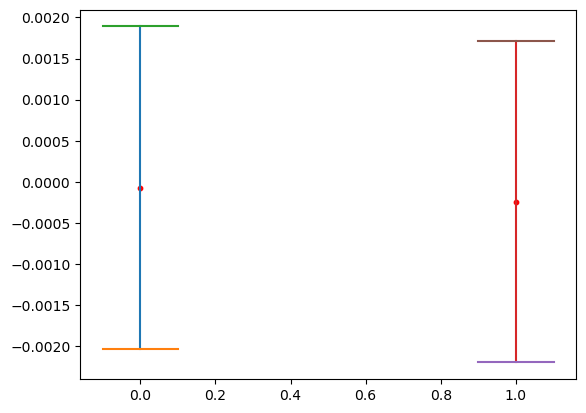

In [ ]:
plt.plot([0,0], [mci1[1], mci1[2]])
plt.scatter([0], [mci1[0]], c='r', s=10)
plt.plot([-0.1, 0.1], [mci1[1], mci1[1]])
plt.plot([-0.1, 0.1], [mci1[2], mci1[2]])

plt.plot([1,1], [mci2[1], mci2[2]])
plt.scatter([1], [mci2[0]], c='r', s=10)
plt.plot([0.9, 1.1], [mci2[1], mci2[1]])
plt.plot([0.9, 1.1], [mci2[2], mci2[2]])
plt.show()

### 3.2 Стат-тесты

In [ ]:
scipy.stats.ttest_ind(a1, a2)

Ttest_indResult(statistic=-0.1400423837741777, pvalue=0.8886265285603494)

# Доля (конверсия)

## 1. Необходимый объем выборки

In [ ]:
conv_arr1 = scipy.stats.bernoulli.rvs(p=0.5, size=1000)

In [ ]:
conv_arr1_mean = np.mean(conv_arr1)

In [ ]:
conv_arr1_sampled_std = np.std(conv_arr1, ddof=1)

In [ ]:
conv_arr1_sampled_std

0.49967356711524546

In [ ]:
conv_eff_size = (0.6 - conv_arr1_mean) / conv_arr1_sampled_std

In [ ]:
conv_eff_size

0.15209930042681485

In [ ]:
zt_ind_solve_power(conv_eff_size, alpha=0.05, power=0.8)

678.5504977547301

## 2. АА-тест

In [ ]:
conv_arr_aa_1 = scipy.stats.bernoulli.rvs(p=0.5, size=1000)

In [ ]:
conv_arr_aa_2 = scipy.stats.bernoulli.rvs(p=0.5, size=1000)

In [ ]:
conv_alphas = []
for _ in range(10000):
    conv_alphas.append(ztest(np.random.choice(a1, 100000), np.random.choice(a2, 100000))[1])

In [ ]:
sum(np.array(conv_alphas) < 0.05) / len(conv_alphas)

0.0554

## 3. Выводы по успешности аб-теста

### 3.1 Доверительные интервалы

In [ ]:
conv_arr_aa_1_ci = proportion_confint(sum(conv_arr_aa_1), len(conv_arr_aa_1))

In [ ]:
conv_arr_aa_2_ci = proportion_confint(sum(conv_arr_aa_2), len(conv_arr_aa_2))

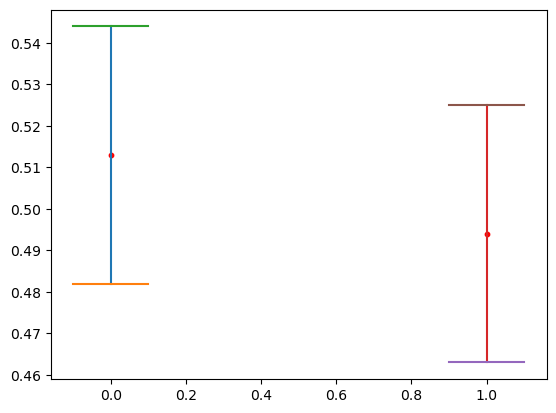

In [ ]:
plt.plot([0,0], [conv_arr_aa_1_ci[0], conv_arr_aa_1_ci[1]])
plt.scatter([0], [conv_arr_aa_1.mean()], c='r', s=10)
plt.plot([-0.1, 0.1], [conv_arr_aa_1_ci[0], conv_arr_aa_1_ci[0]])
plt.plot([-0.1, 0.1], [conv_arr_aa_1_ci[1], conv_arr_aa_1_ci[1]])

plt.plot([1,1], [conv_arr_aa_2_ci[0], conv_arr_aa_2_ci[1]])
plt.scatter([1], [conv_arr_aa_2.mean()], c='r', s=10)
plt.plot([0.9, 1.1], [conv_arr_aa_2_ci[0], conv_arr_aa_2_ci[0]])
plt.plot([0.9, 1.1], [conv_arr_aa_2_ci[1], conv_arr_aa_2_ci[1]])
plt.show()

### 3.2 Стат-тесты

In [ ]:
ztest(conv_arr_aa_1, conv_arr_aa_2)

(0.8494550284014832, 0.3956281441526125)

# Медиана

In [ ]:
medians_a1 = []
for _ in range(1000):
    medians_a1.append(np.median(np.random.choice(a1, size = 1000)))

In [ ]:
np.mean(medians_a1)

0.001558021465890249

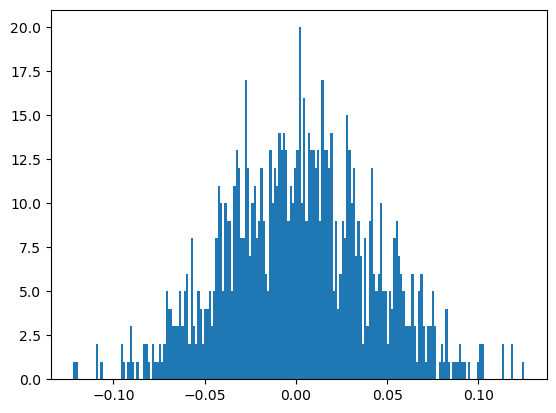

In [ ]:
plt.hist(medians_a1, bins=200)
plt.show()

In [ ]:
effect_size = (0.01 - np.mean(medians_a1)) / np.std(medians_a1, ddof=1)

In [ ]:
effect_size

0.2104076343891827

In [ ]:
TTestIndPower().solve_power(effect_size, alpha=0.05, power=0.8)

/Users/sergey.malyshev/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/sergey.malyshev/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/sergey.malyshev/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/sergey.malyshev/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


355.54241234412

In [ ]:
medians_a1_ci = zconfint(medians_a1)

In [ ]:
np.mean(medians_a1)

0.001558021465890249

In [ ]:
medians_a2 = []
for _ in range(1000):
    medians_a2.append(np.median(np.random.choice(a2, size = 1000)))

In [ ]:
medians_a2_ci = zconfint(medians_a2)

In [ ]:
np.mean(medians_a2)

0.0010272485094024442

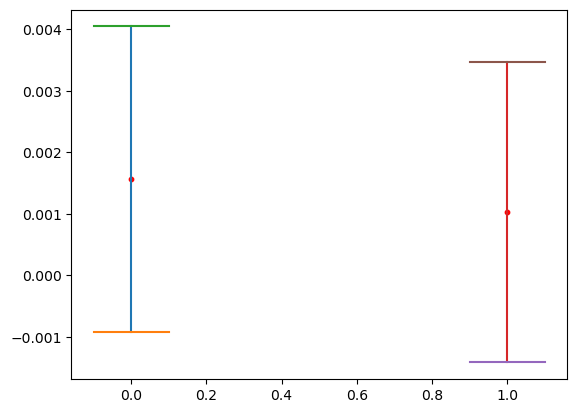

In [ ]:
plt.plot([0,0], [medians_a1_ci[0], medians_a1_ci[1]])
plt.scatter([0], [np.mean(medians_a1)], c='r', s=10)
plt.plot([-0.1, 0.1], [medians_a1_ci[0], medians_a1_ci[0]])
plt.plot([-0.1, 0.1], [medians_a1_ci[1], medians_a1_ci[1]])

plt.plot([1,1], [medians_a2_ci[0], medians_a2_ci[1]])
plt.scatter([1], [np.mean(medians_a2)], c='r', s=10)
plt.plot([0.9, 1.1], [medians_a2_ci[0], medians_a2_ci[0]])
plt.plot([0.9, 1.1], [medians_a2_ci[1], medians_a2_ci[1]])
plt.show()

In [ ]:
scipy.stats.ttest_ind(medians_a1, medians_a2)

Ttest_indResult(statistic=0.29830973449900045, pvalue=0.7654977939151152)